In [199]:
# dropando colunas ficou bom
# nao precisando dropar ficou melhor
# randomsearch ajudou
# DROP: 'SEMANA_DE_NAO_PAGAMENTO', 'SEMANA_PAGAMENTO', 'FERIADO'
# ANTES: 749 -> 590

In [200]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [201]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [202]:
# read csvs & build dataframe
df = pd.read_csv('./datasets/2_dados_correlacionados.csv', ',')
pd.set_option('display.max_rows', 50)

In [203]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt
mpld3.enable_notebook()

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS', 'SEMANA_DE_NAO_PAGAMENTO', 'UMIDADE', 'POS_DATA_FESTIVA'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

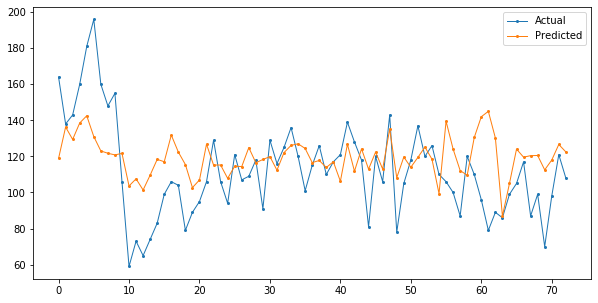

MSE: 598.5804782643028


Weight,Feature
0.1578 ± 0.0675,VESPERA_DATA_FESTIVA
0.1085 ± 0.1416,TEMPERATURA
0.1000 ± 0.0441,PRECIPITACAO
0.0823 ± 0.0526,BAIXA_TEMPORADA
0.0469 ± 0.0210,ALTA_TEMPORADA
0.0275 ± 0.0163,DS
0.0253 ± 0.0144,SEMANA_PAGAMENTO
0.0204 ± 0.0246,FDS
0.0009 ± 0.0544,DATA_NAO_FESTIVA
0 ± 0.0000,QTD_CONCORRENTES


In [204]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree2 = AdaBoostRegressor(DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse', max_depth=600,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=23,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), n_estimators=2000, random_state=0, loss='square')
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_test)
scores = cross_val_score(tree2, X_test, y_test, cv=10)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')

perm = PermutationImportance(tree2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

In [205]:
# # random saearch
# from scipy.stats import randint as sp_randint

# params = {
#     'loss': ['linear'],
#     'learning_rate': [0.1, 0.2, 0.3,0.4],
#     'n_estimators': [100,200,300,400,500,600,1000,2000,3000, 4000, 5000, 6000],
#     'random_state': [0,1,2]
# }
# dt = DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse', max_depth=600,
#                       max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=23,
#                       min_weight_fraction_leaf=0.0, presort='deprecated',
#                       random_state=None, splitter='best')
# ada = AdaBoostRegressor(dt)
# search_obj = RandomizedSearchCV(ada, param_distributions=params)
# fit_obj = search_obj.fit(X_train, y_train)
# print(fit_obj.best_estimator_)

# # modeling
# b_model = fit_obj.best_estimator_
# b_model.fit(X_train, y_train)
# b_y_pred = b_model.predict(X_test)
# b_y_pred
# df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': b_y_pred.flatten()})
# df2.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
# plt.show()

# # printing first metrics
# print(f'RMSE: {metrics.mean_squared_error(y_test, b_y_pred, squared=True)}')